## Does a magnet’s orientation affect its field strength reading?


In [30]:
import matplotlib.pyplot as plt 
import numpy as np 
import pathlib
import scipy.stats as stats

In [3]:
# DO NOT TOUCH THIS!! 
# This reads in all of the collected data and stores it as multiple 3D arrays.
datadir = pathlib.Path.cwd() / 'magnet-data'

pos = iter(sorted(datadir.glob('*.csv')))

# Create an empty list to store all positions.
test = []

# import all csv files from 'magnet-data'
for i in pos: 
    data = np.genfromtxt(i, delimiter=',')
    # Remove NaNs from data
    data = data[np.any(~np.isnan(data), axis=1)]
    # Change time to seconds
    data[:,0] /= 1000 
    # resize the data for 5 tests of data
    test.append(data)

[0.00319698 0.00163146 0.00170827 0.00133462 0.00207215] p-value = 1.0
[1294.37937021 1294.60509227 1294.56086544 1294.69944621 1312.62315756]


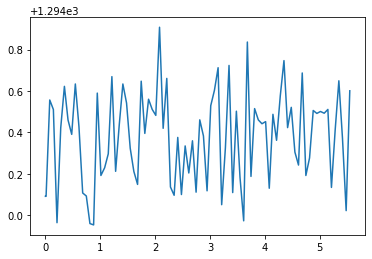

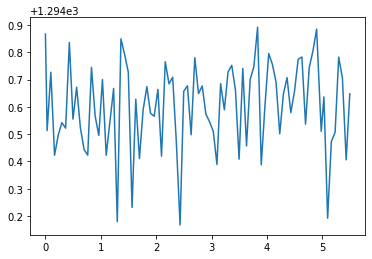

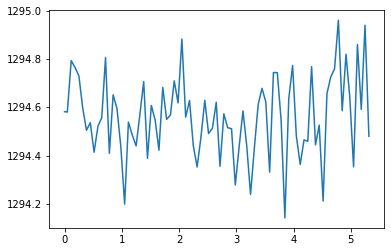

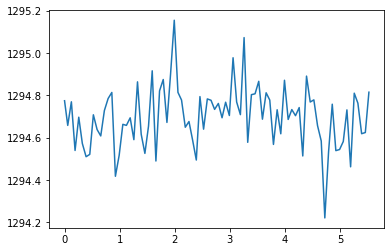

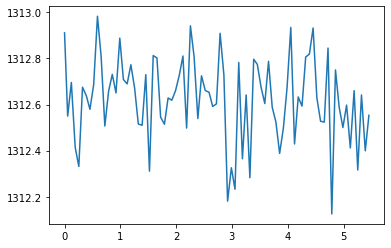

In [37]:
# Test data 1
testnum = 5
# First Position Raw Data

mean = np.zeros(testnum, dtype='float')
chisq = np.zeros(testnum, dtype='float')

for i in range(testnum):
    plt.figure(i)
    plt.plot(test[i][:,0], test[i][:,1])
    # Finding the mean value of the datasets and the chisquared values.
    mean[i] = np.mean(test[i][:,1])
    chisq[i], p = stats.chisquare(test[i][:,1])

# Just looking at the first position data values. 
print(chisq, "p-value = 1.0")
print(mean)